In [2]:
import json

In [57]:
with open('Solar.json', 'r') as f:
    data = json.load(f)

In [58]:
for key, value in data.items():
    print(f"Key: {key}, Value Type: {type(value)}")

Key: name, Value Type: <class 'str'>
Key: center, Value Type: <class 'dict'>
Key: imageryDate, Value Type: <class 'dict'>
Key: postalCode, Value Type: <class 'str'>
Key: administrativeArea, Value Type: <class 'str'>
Key: statisticalArea, Value Type: <class 'str'>
Key: regionCode, Value Type: <class 'str'>
Key: solarPotential, Value Type: <class 'dict'>
Key: boundingBox, Value Type: <class 'dict'>
Key: imageryQuality, Value Type: <class 'str'>
Key: imageryProcessedDate, Value Type: <class 'dict'>


In [59]:
bounding_box_data = data['boundingBox']
bounding_box_structure = {key: type(value).__name__ for key, value in bounding_box_data.items()}
print(bounding_box_structure)

{'sw': 'dict', 'ne': 'dict'}


In [60]:
sw_data = bounding_box_data['sw']
ne_data = bounding_box_data['ne']
sw_structure = {key: type(value).__name__ for key, value in sw_data.items()}
ne_structure = {key: type(value).__name__ for key, value in ne_data.items()}

sw_data = bounding_box_data['sw']
ne_data = bounding_box_data['ne']
sw_lat, sw_long = sw_data['latitude'], sw_data['longitude']
ne_lat, ne_long = ne_data['latitude'], ne_data['longitude']
print(f"SW: ({sw_lat}, {sw_long}), NE: ({ne_lat}, {ne_long})")

SW: (42.2506924, -70.9786266), NE: (42.2508397, -70.9784344)


In [13]:
import folium
import math

# Function to rotate a point
def rotate_point(x, y, angle_degrees, cx, cy):
    angle_radians = math.radians(angle_degrees)
    dx = x - cx
    dy = y - cy
    rotated_dx = dx * math.cos(angle_radians) - dy * math.sin(angle_radians)
    rotated_dy = dx * math.sin(angle_radians) + dy * math.cos(angle_radians)
    return cx + rotated_dx, cy + rotated_dy

# Calculate the midpoint of the bounding box
mid_lat, mid_long = (sw_lat + ne_lat) / 2, (sw_long + ne_long) / 2

# Calculate scaling factor based on latitude
scale_factor = math.cos(math.radians(mid_lat))

# Adjust the deltas based on the scaling factor
scaled_delta_lat = (ne_lat - sw_lat) / scale_factor
scaled_delta_long = ne_long - sw_long

# Calculate the angle of rotation based on the adjusted deltas
angle_degrees = math.degrees(math.atan2(scaled_delta_lat, scaled_delta_long))

# Rotate each corner of the bounding box
rotated_sw = rotate_point(sw_lat / scale_factor, sw_long, angle_degrees, mid_lat / scale_factor, mid_long)
rotated_ne = rotate_point(ne_lat / scale_factor, ne_long, angle_degrees, mid_lat / scale_factor, mid_long)
rotated_se = rotate_point(ne_lat / scale_factor, sw_long, angle_degrees, mid_lat / scale_factor, mid_long)
rotated_nw = rotate_point(sw_lat / scale_factor, ne_long, angle_degrees, mid_lat / scale_factor, mid_long)

# Rescale the rotated coordinates back to the original scale
rotated_sw = (rotated_sw[0] * scale_factor, rotated_sw[1])
rotated_ne = (rotated_ne[0] * scale_factor, rotated_ne[1])
rotated_se = (rotated_se[0] * scale_factor, rotated_se[1])
rotated_nw = (rotated_nw[0] * scale_factor, rotated_nw[1])

# Initialize the folium map centered around the bounding box
zoom_level = 6  # Adjust as needed
m = folium.Map(location=[mid_lat, mid_long], zoom_start=zoom_level)

# Draw the rotated bounding box as a polygon
folium.Polygon([rotated_sw, rotated_se, rotated_ne, rotated_nw, rotated_sw], 
               color='red').add_to(m)

# Show the map
m


In [56]:
for key, value in data.items():
    print(f"Key: {key}, Value Type: {type(value)}")

Key: sample, Value Type: <class 'int'>
Key: recorded_area, Value Type: <class 'float'>
Key: calculated_area, Value Type: <class 'float'>


In [65]:
solarPotential_data = data['solarPotential']
solarPotential_structure = {key: type(value).__name__ for key, value in solarPotential_data.items()}
print(solarPotential_structure)

{'maxArrayPanelsCount': 'int', 'maxArrayAreaMeters2': 'float', 'maxSunshineHoursPerYear': 'int', 'carbonOffsetFactorKgPerMwh': 'float', 'wholeRoofStats': 'dict', 'roofSegmentStats': 'list', 'solarPanelConfigs': 'list', 'financialAnalyses': 'list', 'panelCapacityWatts': 'int', 'panelHeightMeters': 'float', 'panelWidthMeters': 'float', 'panelLifetimeYears': 'int', 'buildingStats': 'dict', 'solarPanels': 'list'}


In [66]:
def explore_nested_dict(d, indent=0, max_samples=3):
    """Recursively explore nested dictionaries."""
    for key, value in d.items():
        print('  ' * indent + f"Key: {key}, Type: {type(value)}")
        
        if isinstance(value, dict):
            explore_nested_dict(value, indent + 1)
            
        elif isinstance(value, list):
            print('  ' * (indent + 1) + f"List Length: {len(value)}")
            
            # Show a few sample values
            samples = value[:max_samples]
            for i, sample in enumerate(samples):
                print('  ' * (indent + 1) + f"Sample {i+1}: {sample}")
                


# Start the exploration
print("Exploring 'solarPotential' Dictionary:")
explore_nested_dict(solarPotential_data)


Exploring 'solarPotential' Dictionary:
Key: maxArrayPanelsCount, Type: <class 'int'>
Key: maxArrayAreaMeters2, Type: <class 'float'>
Key: maxSunshineHoursPerYear, Type: <class 'int'>
Key: carbonOffsetFactorKgPerMwh, Type: <class 'float'>
Key: wholeRoofStats, Type: <class 'dict'>
  Key: areaMeters2, Type: <class 'float'>
  Key: sunshineQuantiles, Type: <class 'list'>
    List Length: 11
    Sample 1: 352
    Sample 2: 708
    Sample 3: 876
  Key: groundAreaMeters2, Type: <class 'float'>
Key: roofSegmentStats, Type: <class 'list'>
  List Length: 5
  Sample 1: {'pitchDegrees': 6.224868, 'azimuthDegrees': 53.74429, 'stats': {'areaMeters2': 46.866325, 'sunshineQuantiles': [352, 567, 834, 867, 888, 910, 935, 956, 976, 992, 1034], 'groundAreaMeters2': 46.59}, 'center': {'latitude': 42.2507849, 'longitude': -70.97850559999999}, 'boundingBox': {'sw': {'latitude': 42.2507291, 'longitude': -70.9785879}, 'ne': {'latitude': 42.2508397, 'longitude': -70.9784355}}, 'planeHeightAtCenterMeters': 8.7207

In [79]:
# Extract 'solarPanels' list from the main 'data' dictionary
solar_panels_data = solarPotential_data.get('solarPanels', [])

# Print the number of items in the list
print(f"Number of items in 'solarPanels': {len(solar_panels_data)}")

# Loop through a few samples in the list to understand its layout
for i, sample in enumerate(solar_panels_data):  # Adjust the slice for more or fewer samples
    print(f"\nSample {i+1}:")
    for key, value in sample.items():
        print(f"  Key: {key}, Value: {value}, Type: {type(value).__name__}")


Number of items in 'solarPanels': 50

Sample 1:
  Key: center, Value: {'latitude': 42.250715199999995, 'longitude': -70.9785327}, Type: dict
  Key: orientation, Value: LANDSCAPE, Type: str
  Key: yearlyEnergyDcKwh, Value: 351.85327, Type: float
  Key: segmentIndex, Value: 3, Type: int

Sample 2:
  Key: center, Value: {'latitude': 42.2507449, 'longitude': -70.9785735}, Type: dict
  Key: orientation, Value: PORTRAIT, Type: str
  Key: yearlyEnergyDcKwh, Value: 350.91074, Type: float
  Key: segmentIndex, Value: 4, Type: int

Sample 3:
  Key: center, Value: {'latitude': 42.2507097, 'longitude': -70.9785258}, Type: dict
  Key: orientation, Value: LANDSCAPE, Type: str
  Key: yearlyEnergyDcKwh, Value: 346.8449, Type: float
  Key: segmentIndex, Value: 3, Type: int

Sample 4:
  Key: center, Value: {'latitude': 42.250738399999996, 'longitude': -70.97856519999999}, Type: dict
  Key: orientation, Value: PORTRAIT, Type: str
  Key: yearlyEnergyDcKwh, Value: 342.73605, Type: float
  Key: segmentIndex,

Number of items in 'solarPanels': 50


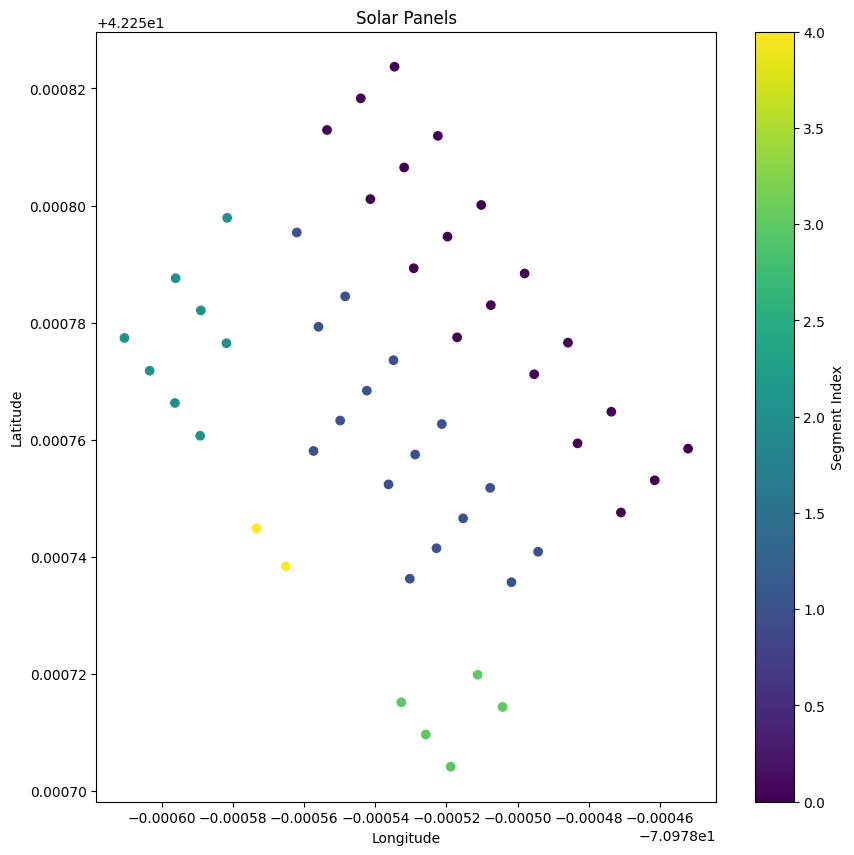

In [80]:
import matplotlib.pyplot as plt

# Initialize an empty list to store the solar panels data
solar_panels_data = []

# Extract 'solarPanels' list from the main 'data' dictionary
solar_panels_list = solarPotential_data.get('solarPanels', [])

# Loop through the list to construct solar_panels_data
for sample in solar_panels_list:
    sample_dict = {
        'center': sample.get('center', {}),
        'orientation': sample.get('orientation', ''),
        'yearlyEnergyDcKwh': sample.get('yearlyEnergyDcKwh', 0.0),
        'segmentIndex': sample.get('segmentIndex', 0)
    }
    solar_panels_data.append(sample_dict)

# Output the number of items in the list for verification
print(f"Number of items in 'solarPanels': {len(solar_panels_data)}")
# Prepare the coordinates for plotting
latitudes = [sample['center']['latitude'] for sample in solar_panels_data]
longitudes = [sample['center']['longitude'] for sample in solar_panels_data]
colors = [sample['segmentIndex'] for sample in solar_panels_data]

# Create the plot
plt.figure(figsize=(10, 10))
sc = plt.scatter(longitudes, latitudes, c=colors, cmap='viridis')

# Add color bar to indicate segmentIndex
plt.colorbar(sc, label='Segment Index')

# Labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Solar Panels')

# Show the plot
plt.show()


In [77]:
# Extract 'wholeRoofStats' from the 'solarPotential_data'
whole_roof_stats = solarPotential_data.get('wholeRoofStats', {})


# If you also want to see the values, you can do so as follows:
for key, value in whole_roof_stats.items():
    print(f"Key: {key}, Value: {value}")



Key: areaMeters2, Value: 134.7749
Key: sunshineQuantiles, Value: [352, 708, 876, 918, 954, 986, 1013, 1042, 1113, 1351, 1472]
Key: groundAreaMeters2, Value: 121.58


In [54]:


# Access the 'solarPanelConfigs' list
solar_panel_configs = solarPotential_data.get('solarPanelConfigs', [])

# Loop through each configuration and print it
for i, config in enumerate(solar_panel_configs):
    print(f"Panel Config {i+1}: {config}")


Panel Config 1: {'panelsCount': 4, 'yearlyEnergyDcKwh': 1392.345, 'roofSegmentSummaries': [{'pitchDegrees': 32.223267, 'azimuthDegrees': 138.11284, 'panelsCount': 2, 'yearlyEnergyDcKwh': 698.6982, 'segmentIndex': 3}, {'pitchDegrees': 30.376875, 'azimuthDegrees': 227.45377, 'panelsCount': 2, 'yearlyEnergyDcKwh': 693.6468, 'segmentIndex': 4}]}
Panel Config 2: {'panelsCount': 5, 'yearlyEnergyDcKwh': 1733.5128, 'roofSegmentSummaries': [{'pitchDegrees': 32.223267, 'azimuthDegrees': 138.11284, 'panelsCount': 3, 'yearlyEnergyDcKwh': 1039.8661, 'segmentIndex': 3}, {'pitchDegrees': 30.376875, 'azimuthDegrees': 227.45377, 'panelsCount': 2, 'yearlyEnergyDcKwh': 693.6468, 'segmentIndex': 4}]}
Panel Config 3: {'panelsCount': 6, 'yearlyEnergyDcKwh': 2073.0344, 'roofSegmentSummaries': [{'pitchDegrees': 32.223267, 'azimuthDegrees': 138.11284, 'panelsCount': 4, 'yearlyEnergyDcKwh': 1379.3877, 'segmentIndex': 3}, {'pitchDegrees': 30.376875, 'azimuthDegrees': 227.45377, 'panelsCount': 2, 'yearlyEnergyDcK

In [21]:
# Code to explore all entries under 'financialAnalyses'
def explore_financialAnalyses(financialAnalyses_list):
    # Initialize an empty list to store the structures of each entry
    all_structures = []
    
    # Loop through each entry in 'financialAnalyses'
    for i, entry in enumerate(financialAnalyses_list):
        # Extract the structure of the current entry
        current_structure = {key: type(value).__name__ for key, value in entry.items()}
        
        # Append the current structure to the list of all structures
        all_structures.append(current_structure)
    
    return all_structures

# Extract the 'financialAnalyses' list from the 'solarPotential' data
financialAnalyses_list = solarPotential_data['financialAnalyses']

# Get the structures of all entries under 'financialAnalyses'
all_financialAnalyses_structures = explore_financialAnalyses(financialAnalyses_list)
all_financialAnalyses_structures[:5]  # Displaying the first 5 entries for illustration


[{'monthlyBill': 'dict', 'panelConfigIndex': 'int'},
 {'monthlyBill': 'dict', 'panelConfigIndex': 'int'},
 {'monthlyBill': 'dict',
  'panelConfigIndex': 'int',
  'financialDetails': 'dict',
  'leasingSavings': 'dict',
  'cashPurchaseSavings': 'dict',
  'financedPurchaseSavings': 'dict'},
 {'monthlyBill': 'dict',
  'panelConfigIndex': 'int',
  'financialDetails': 'dict',
  'leasingSavings': 'dict',
  'cashPurchaseSavings': 'dict',
  'financedPurchaseSavings': 'dict'},
 {'monthlyBill': 'dict',
  'panelConfigIndex': 'int',
  'financialDetails': 'dict',
  'leasingSavings': 'dict',
  'cashPurchaseSavings': 'dict',
  'financedPurchaseSavings': 'dict'}]

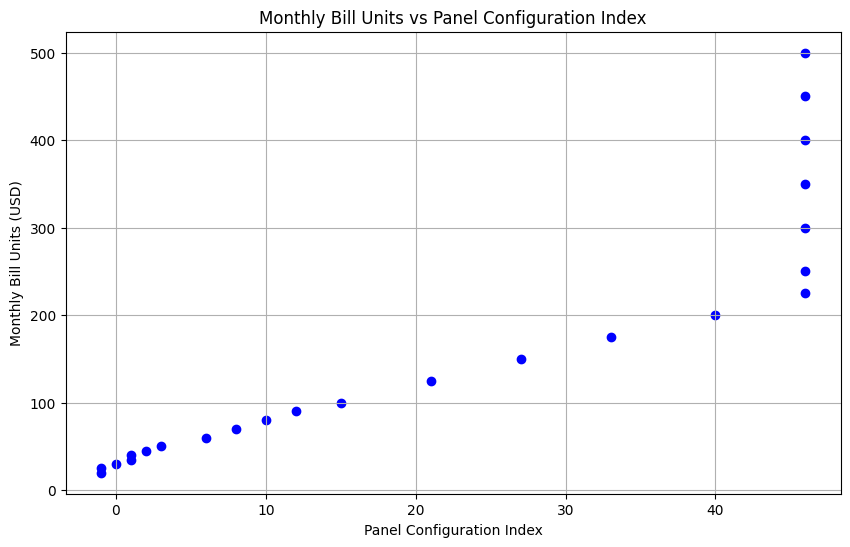

In [22]:
import matplotlib.pyplot as plt
import pandas as pd

financialAnalyses_data = solarPotential_data['financialAnalyses']
# Convert the list of financial analyses to a DataFrame
financial_df = pd.DataFrame(financialAnalyses_data)

# Importing necessary libraries for plotting
import matplotlib.pyplot as plt

# Extracting the 'units' from 'monthlyBill' and 'panelConfigIndex' for all entries
monthlyBill_units = [float(item['monthlyBill']['units']) for item in financialAnalyses_data]
panelConfigIndex_values = [item['panelConfigIndex'] for item in financialAnalyses_data]

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.scatter(panelConfigIndex_values, monthlyBill_units, marker='o', color='b')
plt.title('Monthly Bill Units vs Panel Configuration Index')
plt.xlabel('Panel Configuration Index')
plt.ylabel('Monthly Bill Units (USD)')
plt.grid(True)
plt.show()

In [53]:
# Accessing the 'roofSegmentStats' from the 'solarPotential_data' dictionary
roofSegmentStats_data = solarPotential_data.get('roofSegmentStats', None)

# Printing the structure and a few samples for illustration
if roofSegmentStats_data is not None:
    print(f"Type: {type(roofSegmentStats_data)}")
    print(f"List Length: {len(roofSegmentStats_data)}")
    print("Sample Data:")
    for i, sample in enumerate(roofSegmentStats_data):  # Showing first 3 samples
        print(f"Sample {i+1}: {sample}")
else:
    print("Key 'roofSegmentStats' not found.")

Type: <class 'list'>
List Length: 5
Sample Data:
Sample 1: {'pitchDegrees': 6.224868, 'azimuthDegrees': 53.74429, 'stats': {'areaMeters2': 46.866325, 'sunshineQuantiles': [352, 567, 834, 867, 888, 910, 935, 956, 976, 992, 1034], 'groundAreaMeters2': 46.59}, 'center': {'latitude': 42.2507849, 'longitude': -70.97850559999999}, 'boundingBox': {'sw': {'latitude': 42.2507291, 'longitude': -70.9785879}, 'ne': {'latitude': 42.2508397, 'longitude': -70.9784355}}, 'planeHeightAtCenterMeters': 8.720731}
Sample 2: {'pitchDegrees': 31.658056, 'azimuthDegrees': 48.519768, 'stats': {'areaMeters2': 44.267147, 'sunshineQuantiles': [375, 509, 987, 1009, 1023, 1034, 1045, 1060, 1078, 1121, 1388], 'groundAreaMeters2': 37.68}, 'center': {'latitude': 42.2507583, 'longitude': -70.9785327}, 'boundingBox': {'sw': {'latitude': 42.2507266, 'longitude': -70.9785713}, 'ne': {'latitude': 42.2508121, 'longitude': -70.97846930000001}}, 'planeHeightAtCenterMeters': 15.900317}
Sample 3: {'pitchDegrees': 30.896158, 'az

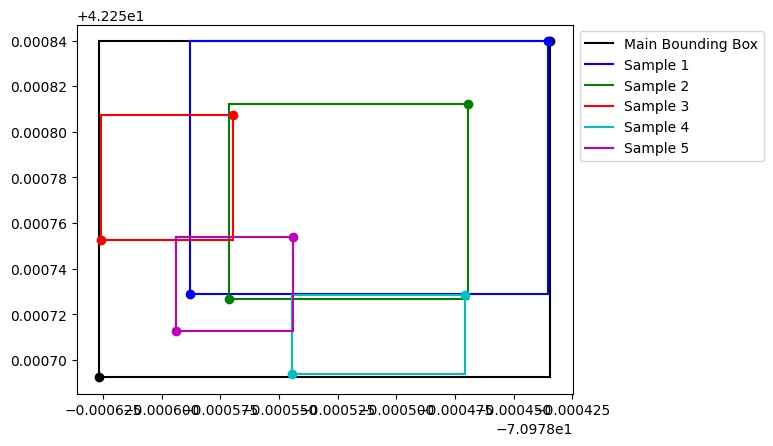

In [36]:


# Extract 'roofSegmentStats' list from 'solarPotential' dictionary
roofSegmentStats = data['solarPotential']['roofSegmentStats']

# Extract main bounding box coordinates
main_bounding_box = data['boundingBox']
main_sw = (main_bounding_box['sw']['latitude'], main_bounding_box['sw']['longitude'])
main_ne = (main_bounding_box['ne']['latitude'], main_bounding_box['ne']['longitude'])

# Plot main bounding box
plt.plot([main_sw[1], main_ne[1]], [main_sw[0], main_sw[0]], 'k-', label='Main Bounding Box')
plt.plot([main_sw[1], main_ne[1]], [main_ne[0], main_ne[0]], 'k-')
plt.plot([main_sw[1], main_sw[1]], [main_sw[0], main_ne[0]], 'k-')
plt.plot([main_ne[1], main_ne[1]], [main_sw[0], main_ne[0]], 'k-')

# Highlight main SW and NE points
plt.scatter([main_sw[1], main_ne[1]], [main_sw[0], main_ne[0]], c='k', zorder=5)

# Plot sample bounding boxes
colors = ['b', 'g', 'r', 'c', 'm']
for i, segment in enumerate(roofSegmentStats):
    sw = (segment['boundingBox']['sw']['latitude'], segment['boundingBox']['sw']['longitude'])
    ne = (segment['boundingBox']['ne']['latitude'], segment['boundingBox']['ne']['longitude'])
    plt.plot([sw[1], ne[1]], [sw[0], sw[0]], colors[i]+'-')
    plt.plot([sw[1], ne[1]], [ne[0], ne[0]], colors[i]+'-')
    plt.plot([sw[1], sw[1]], [sw[0], ne[0]], colors[i]+'-', label=f'Sample {i+1}')
    plt.plot([ne[1], ne[1]], [sw[0], ne[0]], colors[i]+'-')

    # Highlight SW and NE points
    plt.scatter([sw[1], ne[1]], [sw[0], ne[0]], c=colors[i], zorder=5)

# Add legend
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show plot
plt.show()


In [37]:


# Extract heights of each sample and store in a list
sample_heights = []
for i, segment in enumerate(roofSegmentStats):
    height = segment.get('planeHeightAtCenterMeters', None)
    if height is not None:
        sample_heights.append(height)
        print(f"Height of Sample {i+1}: {height} meters")

Height of Sample 1: 8.720731 meters
Height of Sample 2: 15.900317 meters
Height of Sample 3: 15.851688 meters
Height of Sample 4: 15.932819 meters
Height of Sample 5: 17.056068 meters


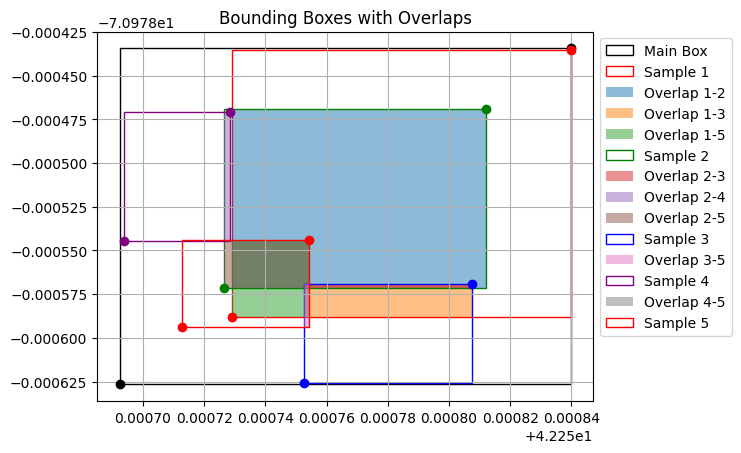

In [62]:
from shapely.geometry import Polygon
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Extract main bounding box
main_box_data = data['boundingBox']
main_box = [main_box_data['sw']['latitude'], main_box_data['sw']['longitude'], 
            main_box_data['ne']['latitude'], main_box_data['ne']['longitude']]

# Extract sample boxes
sample_boxes_data = data['solarPotential']['roofSegmentStats']
sample_boxes = []
for sample in sample_boxes_data:
    box = sample['boundingBox']
    sample_boxes.append([box['sw']['latitude'], box['sw']['longitude'], 
                         box['ne']['latitude'], box['ne']['longitude']])

# Create shapely polygons for sample boxes
polygons = [Polygon([(box[0], box[1]), (box[0], box[3]), (box[2], box[3]), (box[2], box[1])]) for box in sample_boxes]

# Initialize plot
fig, ax = plt.subplots()

# Draw main bounding box
draw_box(ax, main_box, 'Main Box', 'black')

# Draw sample bounding boxes and find intersections
colors = ['red', 'green', 'blue', 'purple']
for i, (box, poly1) in enumerate(zip(sample_boxes, polygons)):
    draw_box(ax, box, f'Sample {i+1}', colors[i % len(colors)])
    
    # Find intersection with other sample boxes and add to plot
    for j, poly2 in enumerate(polygons[i+1:], start=i+1):
        intersection = poly1.intersection(poly2)
        if intersection.is_empty:
            continue
        x, y = intersection.exterior.xy
        ax.fill(x, y, alpha=0.5, label=f'Overlap {i+1}-{j+1}')

# Annotations and Grid
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.title('Bounding Boxes with Overlaps')
plt.show()

def draw_box(ax, box, label, edgecolor, facecolor='none'):
    xmin, ymin, xmax, ymax = box
    ax.add_patch(
        patches.Rectangle(
            (xmin, ymin), xmax - xmin, ymax - ymin,
            linewidth=1, edgecolor=edgecolor, facecolor=facecolor, label=label
        )
    )
    ax.scatter([xmin, xmax], [ymin, ymax], c=edgecolor, zorder=5)


In [63]:
import math

# Function to calculate distance between two latitude-longitude points
def calculate_distance(coord1, coord2):
    R = 6371000  # Radius of Earth in meters
    lat1, lon1 = math.radians(coord1[0]), math.radians(coord1[1])
    lat2, lon2 = math.radians(coord2[0]), math.radians(coord2[1])
    
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    
    a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    
    return R * c

# Extract sample boxes
sample_boxes_data = data['solarPotential']['roofSegmentStats']

# Calculate and compare areas
for i, sample in enumerate(sample_boxes_data):
    box = sample['boundingBox']
    sw = (box['sw']['latitude'], box['sw']['longitude'])
    ne = (box['ne']['latitude'], box['ne']['longitude'])
    
    # Calculate area of bounding box in meters^2
    width = calculate_distance((sw[0], sw[1]), (ne[0], sw[1]))
    height = calculate_distance((sw[0], sw[1]), (sw[0], ne[1]))
    bounding_box_area = width * height
    
    # Extract areaMeters2 and groundAreaMeters2 from JSON
    area_meters2 = sample['stats']['areaMeters2']
    ground_area_meters2 = sample['stats']['groundAreaMeters2']
    
    print(f"Sample {i+1}")
    print(f"Calculated Bounding Box Area: {bounding_box_area} m^2")
    print(f"areaMeters2 from JSON: {area_meters2} m^2")
    print(f"groundAreaMeters2 from JSON: {ground_area_meters2} m^2")
    print("---")

Sample 1
Calculated Bounding Box Area: 154.2640524044905 m^2
areaMeters2 from JSON: 46.866325 m^2
groundAreaMeters2 from JSON: 46.59 m^2
---
Sample 2
Calculated Bounding Box Area: 79.81618125956814 m^2
areaMeters2 from JSON: 44.267147 m^2
groundAreaMeters2 from JSON: 37.68 m^2
---
Sample 3
Calculated Bounding Box Area: 28.23794834080197 m^2
areaMeters2 from JSON: 20.452177 m^2
groundAreaMeters2 from JSON: 17.55 m^2
---
Sample 4
Calculated Bounding Box Area: 23.270808270805663 m^2
areaMeters2 from JSON: 14.681255 m^2
groundAreaMeters2 from JSON: 12.42 m^2
---
Sample 5
Calculated Bounding Box Area: 18.831351267275046 m^2
areaMeters2 from JSON: 8.507996 m^2
groundAreaMeters2 from JSON: 7.34 m^2
---


In [64]:
def greedy_panel_fitting(samples):
    """Calculate the maximum number of panels that can fit in each sample using a Greedy Method."""
    
    panel_count_per_sample = {}  # Dictionary to hold the number of panels that can fit in each sample
    panel_width = 65  # Width of the panel in inches
    panel_height = 39  # Height of the panel in inches

    # Loop through each sample to calculate the number of panels that can fit
    for i, sample in enumerate(samples):
        # Extract the coordinates for the South-West and North-East corners of the bounding box
        sw_lat, sw_lon = sample['boundingBox']['sw']['latitude'], sample['boundingBox']['sw']['longitude']
        ne_lat, ne_lon = sample['boundingBox']['ne']['latitude'], sample['boundingBox']['ne']['longitude']

        # Convert latitude and longitude to a Cartesian coordinate system
        # For simplicity, assume 1 degree latitude or longitude is approximately 69 miles,
        # and 1 mile is 63360 inches
        width = abs(ne_lon - sw_lon) * 69 * 63360  # Width of the bounding box in inches
        height = abs(ne_lat - sw_lat) * 69 * 63360  # Height of the bounding box in inches

        # Calculate how many panels can fit along the width and height of the bounding box
        panels_in_width = int(width // panel_width)
        panels_in_height = int(height // panel_height)

        # Calculate the total number of panels that can fit in this bounding box
        total_panels = panels_in_width * panels_in_height

        # Store the result in the dictionary
        panel_count_per_sample[f"Sample_{i+1}"] = total_panels

    return panel_count_per_sample

# Extract 'roofSegmentStats' from the 'solarPotential_data'
roof_segment_stats = solarPotential_data.get('roofSegmentStats', [])

# Initialize an empty list to hold the samples
samples = []

# Loop through each segment to extract the bounding box information
for segment in roof_segment_stats:
    bounding_box = segment.get('boundingBox', {})
    sample = {'boundingBox': bounding_box}
    samples.append(sample)


# Run the Greedy Method to find the number of panels that can fit in each sample
result = greedy_panel_fitting(samples)
print("Total number of panels that can fit in each sample:", result)

Total number of panels that can fit in each sample: {'Sample_1': 120, 'Sample_2': 54, 'Sample_3': 18, 'Sample_4': 12, 'Sample_5': 12}
